In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress



In [2]:
 # Load draft data set into pandas
draft_data = pd.read_excel("Resources/Draft Data 1995-2018.xlsx")
draft_data.head()

,Draft Year,Draft #,Club,Player,Age,Height,Weight,Original Club,Games,Goals,Votes,Premiership Years,Brownlow Years,Best & Fairest Years,Rising Star Year,Premiership Count,Brownlow Count,Best & Fairest Count,Rising Star Count
0,1990,1,Geelong,Stephen Hooper,21.0,198.0,98.0,East Perth,21,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990,2,Carlton,James Cook,16.0,190.0,95.0,North Hobart,77,139,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990,3,Fitzroy,David Donato,20.0,178.0,75.0,Clarence,12,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990,4,Collingwood,Jason McCartney,16.0,191.0,95.0,Nhill,182,63,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990,5,Geelong,Stewart Devlin,18.0,NaN,NaN,Horsham FC,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


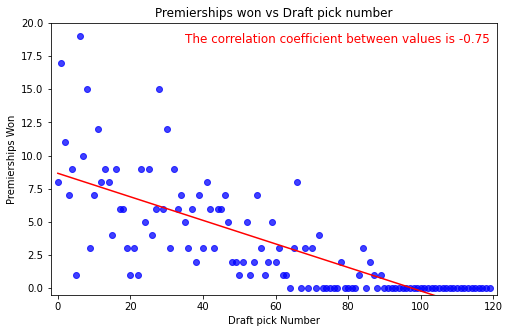

In [3]:
#Obtain Premiership success for draft picks
plot_prem_sum = draft_data.groupby(["Draft #"])["Premiership Count"].sum()

x_axis = np.arange(0,len(plot_prem_sum))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#Correlation Coefficient
correlation = st.pearsonr(x_axis,plot_prem_sum)
corr_note =(f'''The correlation coefficient between values is {round(correlation[0],2)}''')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, plot_prem_sum)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Scatter
plt.figure(figsize =(8,5))
plt.scatter(x_axis, plot_prem_sum,
            marker="o", 
            facecolors="blue",  
            alpha=0.75)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(corr_note,(35,18.5),fontsize=12,color="red")

plt.ylim(-0.5,20)
plt.xlim(-2,121)

plt.title("Premierships won vs Draft pick number")
plt.ylabel("Premierships Won")
plt.xlabel("Draft pick Number")

plt.show()

In [4]:
#validate data entries
plot_prem_sum

Draft #
1       8.0
2      17.0
3      11.0
4       7.0
5       9.0
       ... 
118     0.0
120     0.0
121     0.0
122     0.0
124     0.0
Name: Premiership Count, Length: 120, dtype: float64

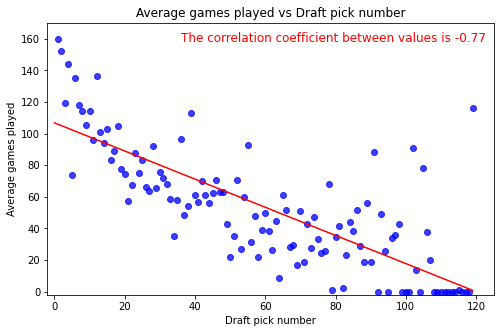

In [5]:
#Obtain Average games played for draft picks
scatter_games = draft_data.groupby(["Draft #"])["Games"].mean()

x_axis_games = np.arange(0,len(scatter_games))

tick_locations = []
for x in x_axis_games:
    tick_locations.append(x)

#Correlation Coefficient
correlation = st.pearsonr(x_axis_games,scatter_games)
corr_note2 = (f'''The correlation coefficient between values is {round(correlation[0],2)}''')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_games, scatter_games)
regress_values = x_axis_games * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter
plt.figure(figsize =(8,5))
plt.scatter(x_axis_games, scatter_games,
            marker="o", 
            facecolors="blue",  
            alpha=0.75)
plt.plot(x_axis_games,regress_values,"r-")
plt.annotate(corr_note2,(36,158),fontsize=12,color="red")

plt.ylim(-2,170)
plt.xlim(-2,125)

plt.title("Average games played vs Draft pick number")
plt.ylabel("Average games played")
plt.xlabel("Draft pick number")

plt.show()

In [6]:
#validate data entries
scatter_games

Draft #
1      181.241379
2      159.931034
3      152.068966
4      119.413793
5      144.172414
          ...    
118      1.000000
120      0.000000
121      0.000000
122      0.000000
124    116.000000
Name: Games, Length: 120, dtype: float64

In [7]:
#Create Bins in groups of 20
#Did not include draft picks 100+ as no individual awards won
bins_20 = [0, 19.9, 39.9, 59.9, 79.9, 99.9]

group_names_20 = ["1-20","21-40","41-60","61-80","81-100"]

draft_data["Draft Interval"] = pd.cut(draft_data["Draft #"], bins_20, labels=group_names_20,include_lowest=True)


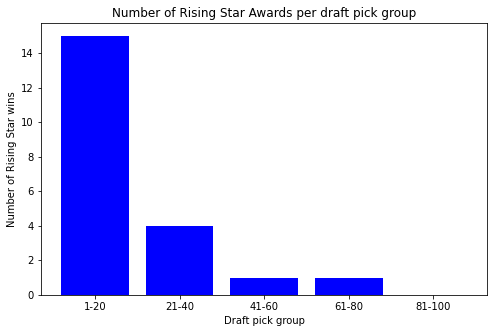

In [8]:
#Obtain Rising Star awwards won by draft picks in Bins
draft_interval_20 = draft_data.groupby(["Draft Interval"])['Rising Star Count'].sum()

x_axis = np.arange(0,len(draft_interval_20))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#Plot Bar Graph
plt.figure(figsize =(8,5))
plt.title("Number of Rising Star Awards per draft pick group")
plt.xlabel("Draft pick group")
plt.ylabel("Number of Rising Star wins")

plt.bar(draft_interval_20.index,draft_interval_20, 
        color='blue', 
        align="center")
plt.xticks(tick_locations,draft_interval_20.index,rotation ="horizontal");

In [9]:
#validate data entries
draft_interval_20

Draft Interval
1-20      15.0
21-40      4.0
41-60      1.0
61-80      1.0
81-100     0.0
Name: Rising Star Count, dtype: float64

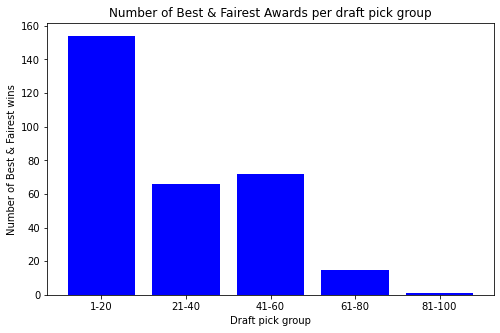

In [10]:
#Obtain B&F awwards won by draft picks in Bins
draft_interval_BF20 = draft_data.groupby(["Draft Interval"])['Best & Fairest Count'].sum()

x_axis = np.arange(0,len(draft_interval_BF20))

tick_locations = []
for x in x_axis:
    tick_locations.append(x)

#Plot Bar Graph
plt.figure(figsize =(8,5))
plt.title("Number of Best & Fairest Awards per draft pick group")
plt.xlabel("Draft pick group")
plt.ylabel("Number of Best & Fairest wins")

plt.bar(draft_interval_BF20.index,draft_interval_BF20, 
        color='blue', 
        align="center")
plt.xticks(tick_locations,draft_interval_BF20.index,rotation ="horizontal");

In [11]:
#validate data entries
draft_interval_BF20

Draft Interval
1-20      154.0
21-40      66.0
41-60      72.0
61-80      15.0
81-100      1.0
Name: Best & Fairest Count, dtype: float64